In [1]:
# Standard library
import copy
import os
import random
import sys

# Scientific / data stack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Statistics / modelling
from scipy.stats import pearsonr

# Machine learning / imputation
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
RNG_SEED = 42

def seed_all(seed: int = RNG_SEED) -> None:
    """
    Set random seeds for reproducibility across Python, NumPy,
    and hash-based operations.
    """
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)


In [3]:
seed_all()

Data001 = pd.read_csv("/content/drive/MyDrive/Paper(2025Dec)_SimulatedCVD/Data001_ReadyForCoxPH.csv")
Data001 = Data001.drop(['Unnamed: 0'], axis = 1)


###===######===######===######===######===###
DataAsset1_preview
   IRSD_quintile        Age smoking_status        BMI  diabetes  CKD  \
0              4  50.395265            non  28.166346         0    0   
1              3  39.226761             ex  16.825992         0    0   
2              5  55.489004            non  23.523419         0    0   
3              4  51.910529            non  31.981932         0    0   
4              1  47.091570             ex  25.351159         0    0   

      HbA1c       eGFR         SBP  AF  cvd_event  cvd_time  
0  4.317890  83.077560  118.668194   0          1  2.963423  
1  4.700951  81.488401  123.719732   0          0  4.407252  
2  3.669685  86.779230  126.650517   0          0  4.490739  
3  4.486977  94.704093  113.889670   0          0  4.888965  
4  4.315440  86.336256  125.912615   0          0  4.490326  

###===######===######===######===######===###
DataAsset1_column_summary
            column    dtype  non_null_count  null_count


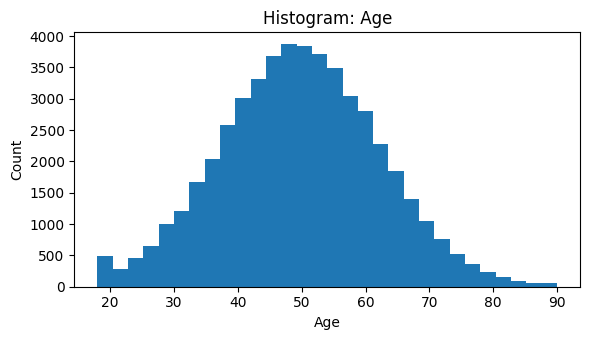

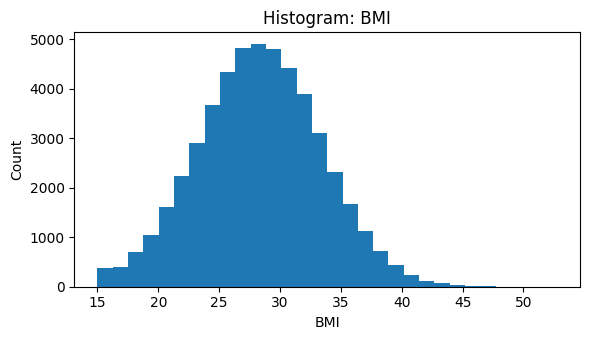

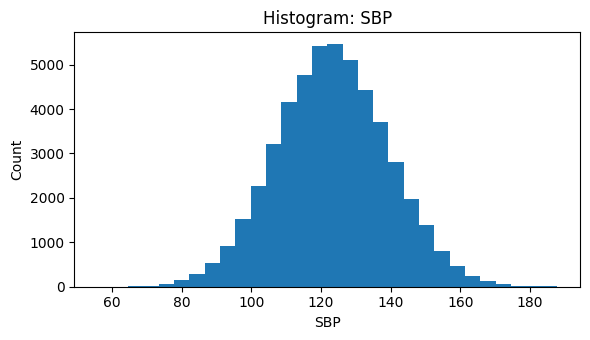

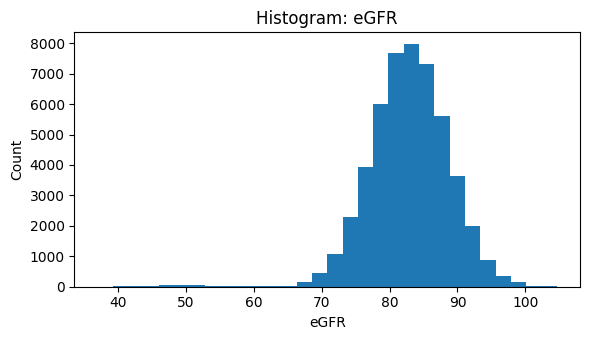

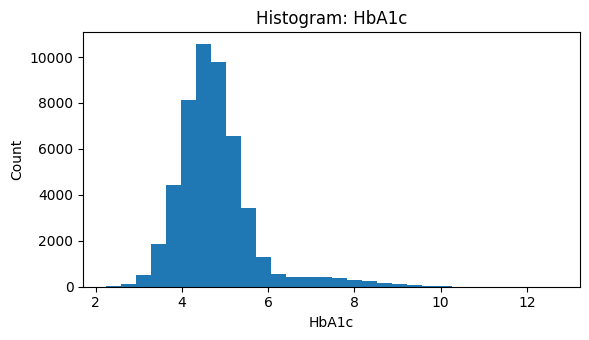

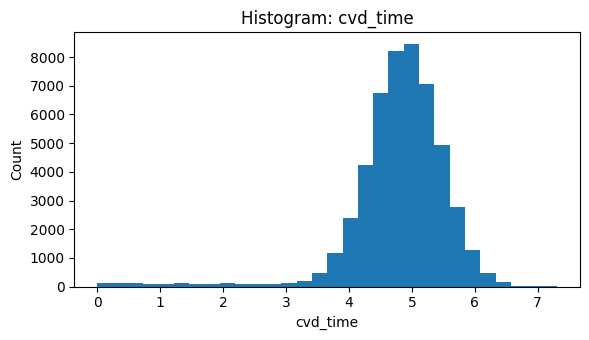

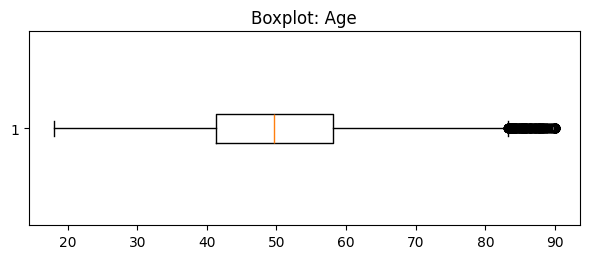

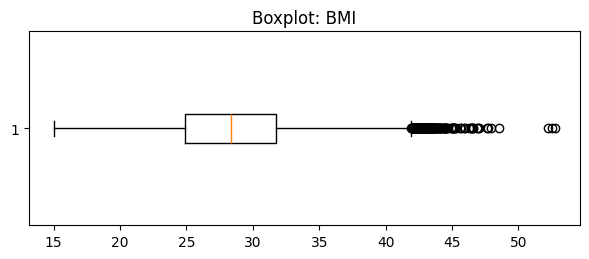

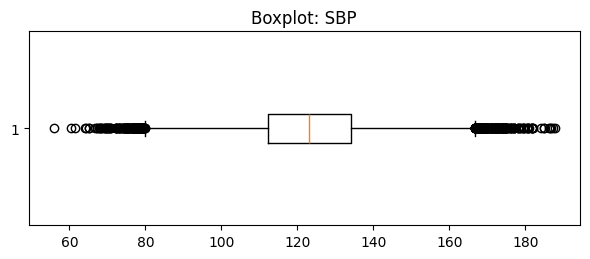

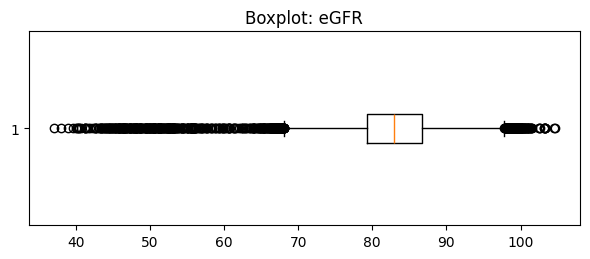

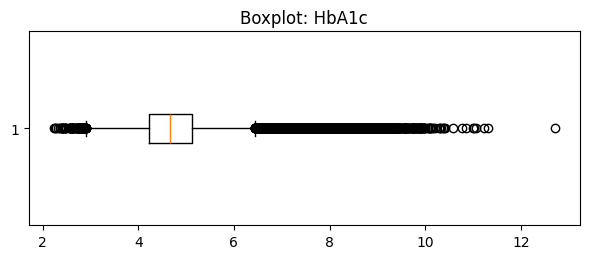

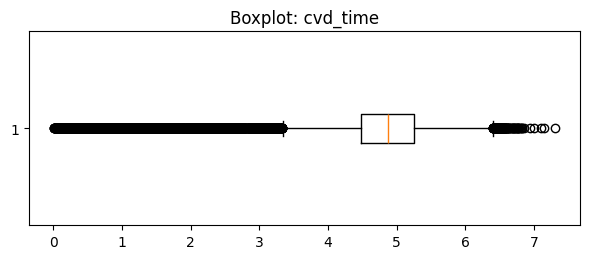

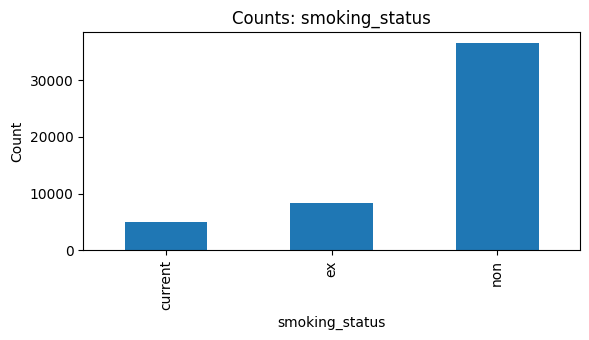

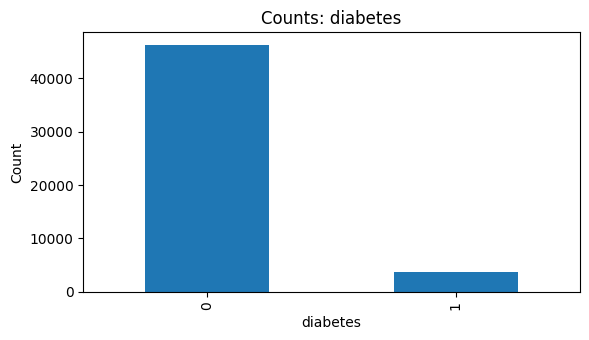

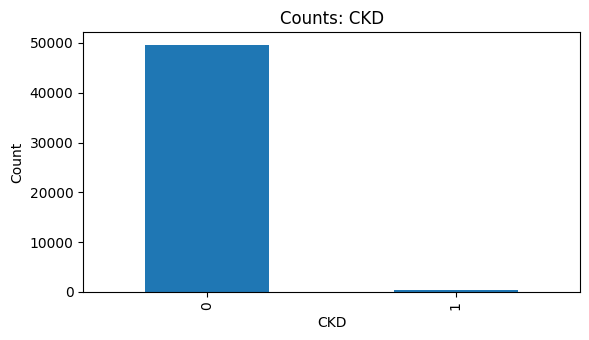

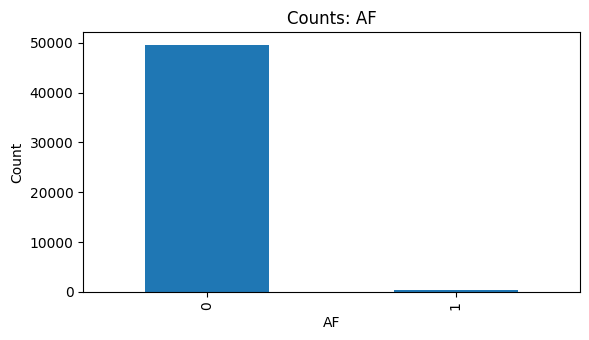


###===######===######===######===######===###
DataAsset1_correlation_matrix
               IRSD_quintile    Age    BMI  diabetes    CKD  HbA1c   eGFR  \
IRSD_quintile          1.000 -0.001 -0.172    -0.026 -0.013 -0.024  0.007   
Age                   -0.001  1.000 -0.001     0.179  0.046  0.133 -0.386   
BMI                   -0.172 -0.001  1.000     0.134  0.042  0.093 -0.020   
diabetes              -0.026  0.179  0.134     1.000  0.068  0.703 -0.091   
CKD                   -0.013  0.046  0.042     0.068  1.000  0.043 -0.437   
HbA1c                 -0.024  0.133  0.093     0.703  0.043  1.000 -0.067   
eGFR                   0.007 -0.386 -0.020    -0.091 -0.437 -0.067  1.000   
SBP                   -0.075  0.311  0.336     0.231  0.092  0.163 -0.154   
AF                    -0.005  0.057  0.004     0.008  0.027  0.010 -0.031   
cvd_event             -0.018  0.220  0.074     0.408  0.056  0.345 -0.112   
cvd_time               0.010 -0.151 -0.053    -0.281 -0.050 -0.237  0.078   

In [11]:
# Live-demo script for a 30-minute interactive intro (executes and displays outputs for students)
# This code will run in the notebook environment and produce tables + plots to explore Data Asset 1.
# It uses matplotlib for plots (no seaborn) and utilizes the notebook display for tables.
# Each plot is created separately per the tool instructions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset safely
df = copy.copy(Data001)

# 1) Basic shape and column list
shape = df.shape
columns = df.columns.tolist()

# 2) Show first 5 rows
print("\n" + "###===###"*5)
print("DataAsset1_preview")
print(df.head())

# 3) Column data types and non-null counts
dtypes_table = pd.DataFrame({
    "column": df.columns,
    "dtype": [str(dt) for dt in df.dtypes],
    "non_null_count": df.notna().sum().values,
    "null_count": df.isna().sum().values
})
print("\n" + "###===###"*5)
print("DataAsset1_column_summary")
print(dtypes_table)

# 4) Missingness percentage (sorted)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False).reset_index()
missing_pct.columns = ["column", "missing_pct"]
print("\n" + "###===###"*5)
print("DataAsset1_missingness")
print(missing_pct)

# 5) Basic numeric summary for continuous variables
numeric = df.select_dtypes(include=[np.number])
numeric_summary = numeric.describe().T
print("\n" + "###===###"*5)
print("DataAsset1_numeric_summary")
print(numeric_summary)

# 6) Categorical candidate columns: show unique counts and top values
cat_candidates = [c for c in df.columns if df[c].dtype == object or df[c].nunique() <= 20]
cat_stats = []
for c in cat_candidates:
    top = df[c].value_counts(dropna=False).head(5).to_dict()
    cat_stats.append({
        "column": c,
        "unique_values": df[c].nunique(dropna=True),
        "top_values_sample": str(top)
    })
cat_stats_df = pd.DataFrame(cat_stats).sort_values("unique_values", ascending=False)
print("\n" + "###===###"*5)
print("DataAsset1_categorical_summary")
print(cat_stats_df)

# 7) For key variables commonly used in labs, show distributions:
key_numeric = ["Age", "BMI", "SBP", "eGFR", "HbA1c", "cvd_time"]  # try these; some may not exist exactly
existing_numeric = [c for c in key_numeric if c in df.columns and pd.api.types.is_numeric_dtype(df[c])]

for c in existing_numeric:
    plt.figure(figsize=(6,3.5))
    plt.hist(df[c].dropna(), bins=30)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 8) Boxplots for numeric variables (one plot each)
for c in existing_numeric:
    plt.figure(figsize=(6,2.7))
    plt.boxplot(df[c].dropna(), vert=False)
    plt.title(f"Boxplot: {c}")
    plt.tight_layout()
    plt.show()

# 9) Bar plots for categorical variables we expect: IRSD_quintile, SMOKING_STATUS, Diabetes, CKD, AF
expected_cats = ["IRSD_Quintile", "IRSD", "SMOKING_STATUS", "smoking_status", "Diabetes", "diabetes", "CKD", "AF"]
existing_cats = [c for c in expected_cats if c in df.columns]

for c in existing_cats:
    counts = df[c].value_counts(dropna=False).sort_index()
    plt.figure(figsize=(6,3.5))
    counts.plot(kind="bar")
    plt.title(f"Counts: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 10) Show a correlation matrix for numeric variables (lower-triangular printed table)
if numeric.shape[1] > 1:
    corr = numeric.corr().round(3)
    # Display full correlation table
    print("\n" + "###===###"*5)
    print("DataAsset1_correlation_matrix")
    print(corr)

# 11) Quick data-quality checks: duplicated IDs, improbable values, ranges
quality_checks = []
if "Patient_ID" in df.columns:
    quality_checks.append(("n_unique_Patient_ID", df["Patient_ID"].nunique(), "n_rows", df.shape[0]))
# Example improbable checks
for c in existing_numeric:
    quality_checks.append((f"{c}_min", df[c].min(), f"{c}_max", df[c].max()))
quality_df = pd.DataFrame([{
    "check": qc[0],
    "value": qc[1],
    "meta": qc[2] if len(qc)>2 else "",
    "meta_value": qc[3] if len(qc)>3 else ""
} for qc in quality_checks])
print("\n" + "###===###"*5)
print("DataAsset1_quality_checks")
print(quality_df)

# 12) Provide a short text summary (print) to read aloud during the demo
summary_text = f"""
Quick demo summary:
- Shape: {shape[0]} rows × {shape[1]} columns
- Key numeric columns detected: {', '.join(existing_numeric) if existing_numeric else 'None of the expected numeric keys found'}
- Key categorical columns detected: {', '.join(existing_cats) if existing_cats else 'None of the expected categorical keys found'}
- Top 3 columns with most missingness: {', '.join(missing_pct.head(3)['column'].tolist())}
Use these displays to show students how to:
1) inspect the table structure,
2) prioritise columns to clean,
3) find suspicious values, and
4) decide which preprocessing steps the lab will require.
"""
print(summary_text)
